Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2))  
# Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5))  
# Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10))  
# Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3))  
# Randomly selects 3 elements from the given list

# To generate random values from a normally distributed data with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10))  
# Generates 10 random values from a normal distribution with mean 0 (loc) and std deviation 1 (scale)

# To set a seed for random number generation (to ensure reproducibility)
np.random.seed(42)  
# This ensures that random number generation is reproducible. Every time you run the program, you'll get the same sequence of random numbers when using this seed.


AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [13]:
import pandas as pd
import numpy as np
import time

# Using pandas to generate the dataset
start_time_pandas = time.time()
df_pandas = pd.DataFrame({'random_data': np.random.randint(1, 101, size=1000000)})
end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas

# Using NumPy to generate the dataset
start_time_numpy = time.time()
data_numpy = np.random.randint(1, 101, size=1000000)
end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy

# Printing the time taken for each operation
print(f"Time taken to generate dataset using pandas: {pandas_time:.6f} seconds")
print(f"Time taken to generate dataset using NumPy: {numpy_time:.6f} seconds")

# Comparing the time taken by pandas and NumPy
if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Time taken to generate dataset using pandas: 0.039753 seconds
Time taken to generate dataset using NumPy: 0.009928 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [26]:
import pandas as pd
import numpy as np
import time

start_time_pandas = time.time()

df = pd.read_csv('/Users/gaokangchen/NGEX6/sleep_health.csv')

df_numeric = df.select_dtypes(include=[np.number])

mean_values_pandas = {
    'Sleep Duration': df['Sleep Duration'].mean(),
    'Systolic Blood Pressure': df['Systolic blood pressure'].mean(),
    'Diastolic Blood Pressure': df['Diastolic blood pressure'].mean(),
    'Heart Rate': df['Heart Rate'].mean(),
    'Daily Steps': df['Daily Steps'].mean()
}

correlation_pandas = df_numeric.corr()
correlation_sleep_age_pandas = df['Sleep Duration'].corr(df['Age'])
correlation_sleep_heart_rate_pandas = df['Sleep Duration'].corr(df['Heart Rate'])
correlation_sleep_daily_steps_pandas = df['Sleep Duration'].corr(df['Daily Steps'])

std_sleep_duration_pandas = df['Sleep Duration'].std()

end_time_pandas = time.time()

start_time_numpy = time.time()

data_np = np.genfromtxt('/Users/gaokangchen/NGEX6/sleep_health.csv', delimiter=',', names=True, dtype=None, encoding='utf-8')

numeric_data_np = np.array([data_np['Sleep_Duration'], data_np['Age'], data_np['Heart_Rate'], data_np['Daily_Steps']]).astype(float)

mean_values_numpy = {
    'Sleep Duration': np.mean(data_np['Sleep_Duration']),
    'Systolic Blood Pressure': np.mean(data_np['Systolic_blood_pressure']),
    'Diastolic Blood Pressure': np.mean(data_np['Diastolic_blood_pressure']),
    'Heart Rate': np.mean(data_np['Heart_Rate']),
    'Daily Steps': np.mean(data_np['Daily_Steps'])
}

correlation_numpy = np.corrcoef(numeric_data_np)

correlation_sleep_age_numpy = correlation_numpy[0, 1]
correlation_sleep_heart_rate_numpy = correlation_numpy[0, 2]
correlation_sleep_daily_steps_numpy = correlation_numpy[0, 3]

std_sleep_duration_numpy = np.std(data_np['Sleep_Duration'])

end_time_numpy = time.time()

pandas_time = end_time_pandas - start_time_pandas
numpy_time = end_time_numpy - start_time_numpy

print(f"Pandas Mean Values: {mean_values_pandas}")
print(f"NumPy Mean Values: {mean_values_numpy}")
print(f"Pandas Correlation Sleep Duration and Age: {correlation_sleep_age_pandas}")
print(f"NumPy Correlation Sleep Duration and Age: {correlation_sleep_age_numpy}")
print(f"Pandas Standard Deviation of Sleep Duration: {std_sleep_duration_pandas}")
print(f"NumPy Standard Deviation of Sleep Duration: {std_sleep_duration_numpy}")

print(f"Time taken using Pandas: {pandas_time:.6f} seconds")
print(f"Time taken using NumPy: {numpy_time:.6f} seconds")

if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Pandas Mean Values: {'Sleep Duration': np.float64(7.132085561497325), 'Systolic Blood Pressure': np.float64(128.55347593582889), 'Diastolic Blood Pressure': np.float64(84.64973262032086), 'Heart Rate': np.float64(70.16577540106952), 'Daily Steps': np.float64(6816.844919786096)}
NumPy Mean Values: {'Sleep Duration': np.float64(7.132085561497325), 'Systolic Blood Pressure': np.float64(128.55347593582889), 'Diastolic Blood Pressure': np.float64(84.64973262032086), 'Heart Rate': np.float64(70.16577540106952), 'Daily Steps': np.float64(6816.844919786096)}
Pandas Correlation Sleep Duration and Age: 0.34470935816474396
NumPy Correlation Sleep Duration and Age: 0.34470935816474396
Pandas Standard Deviation of Sleep Duration: 0.7956567308898189
NumPy Standard Deviation of Sleep Duration: 0.7945923066929989
Time taken using Pandas: 0.056405 seconds
Time taken using NumPy: 0.023240 seconds
NumPy is faster.


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

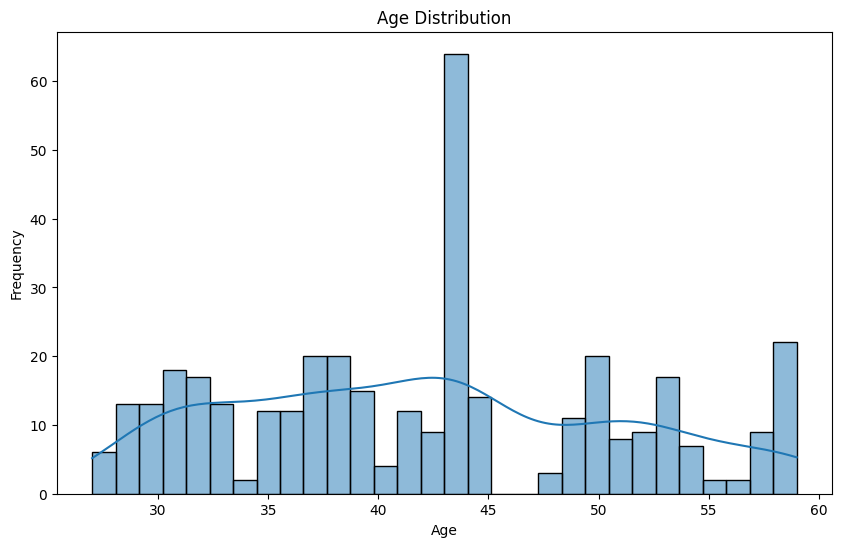

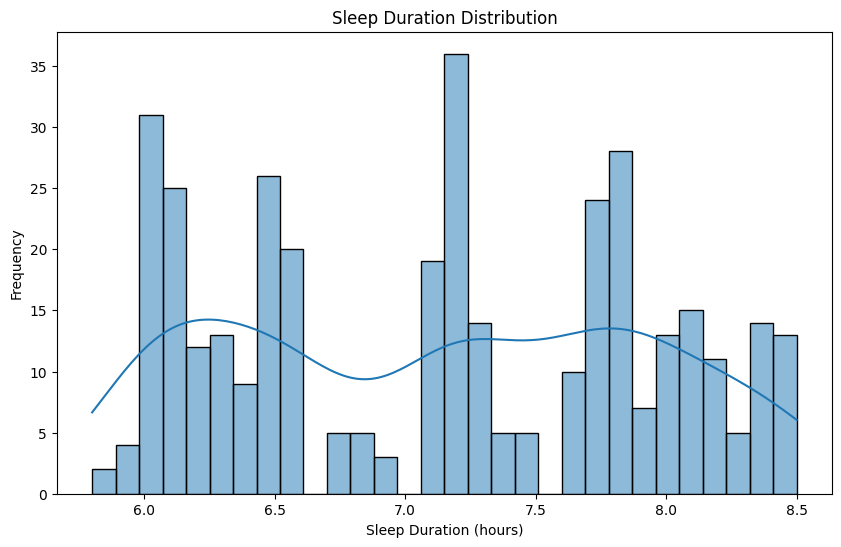

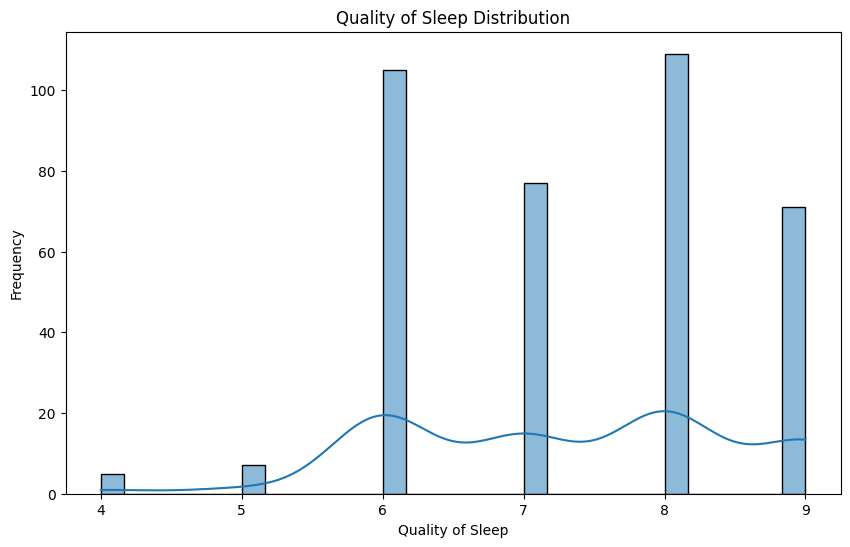

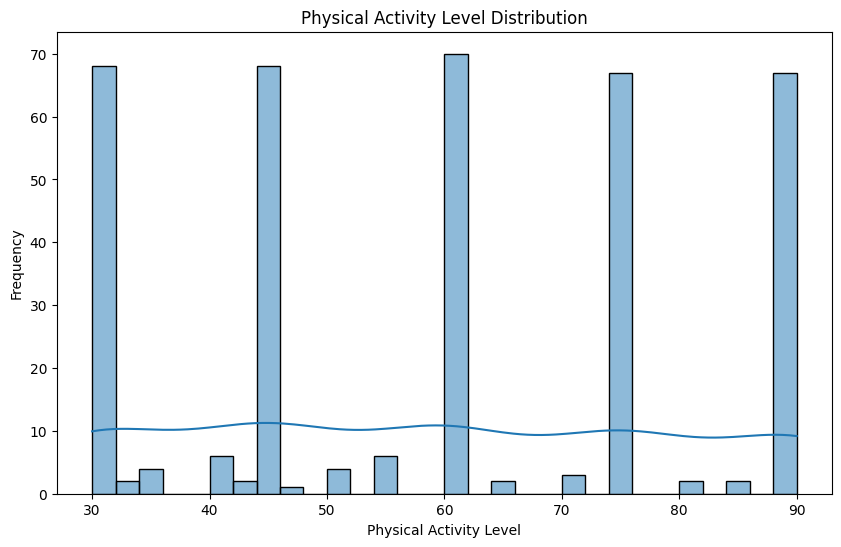

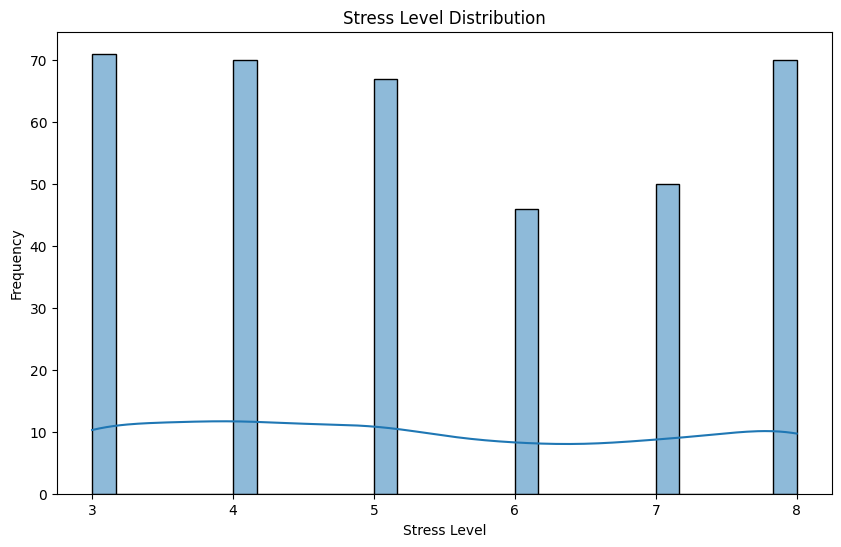

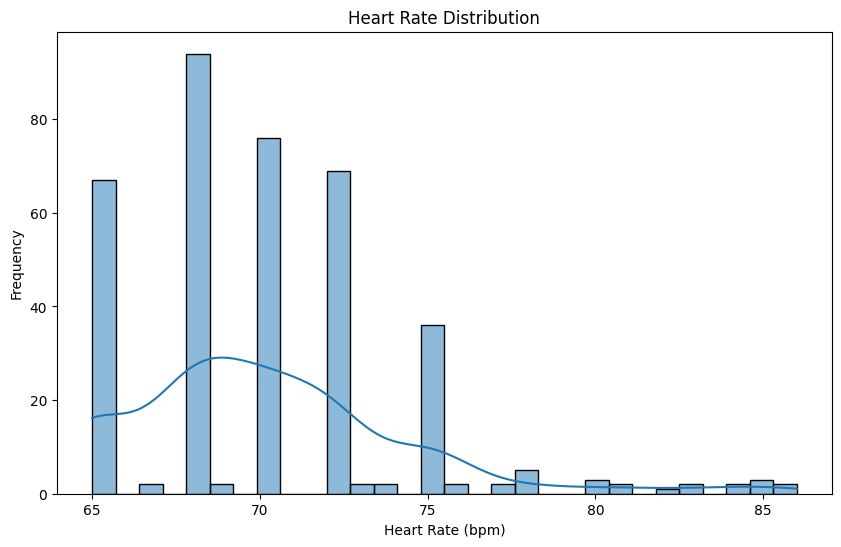

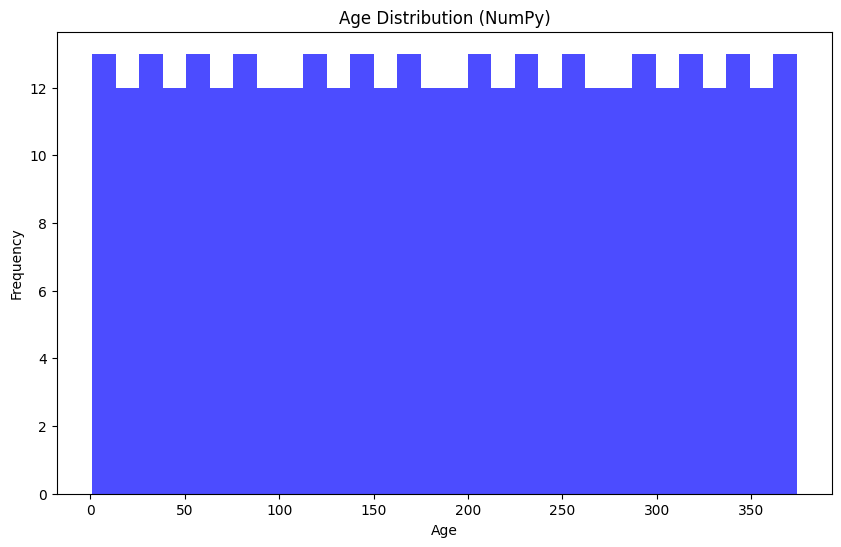

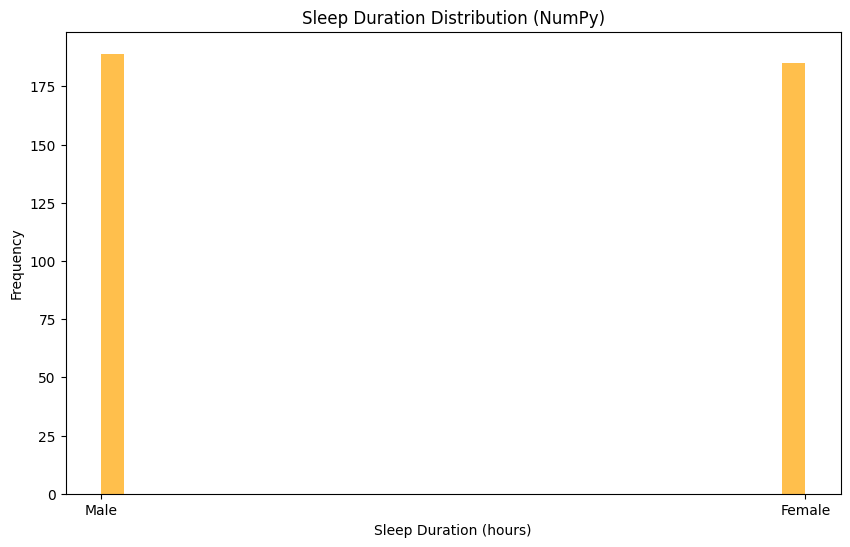

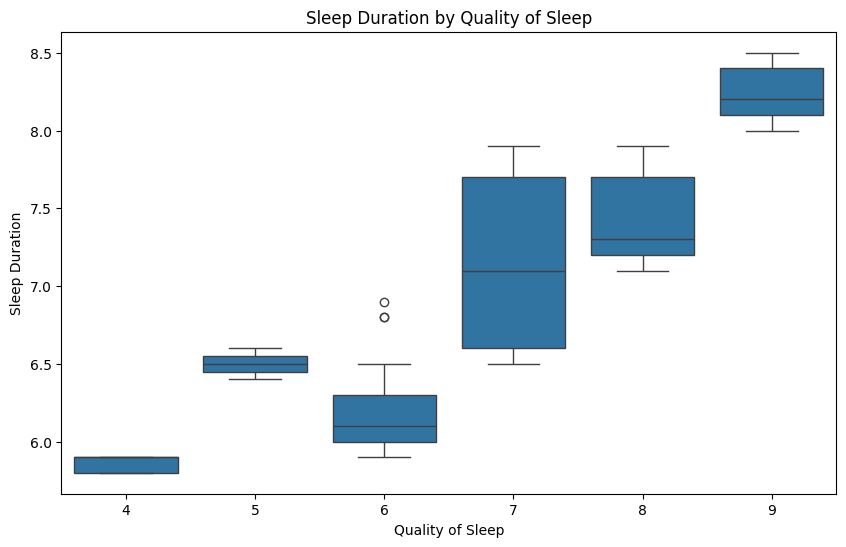

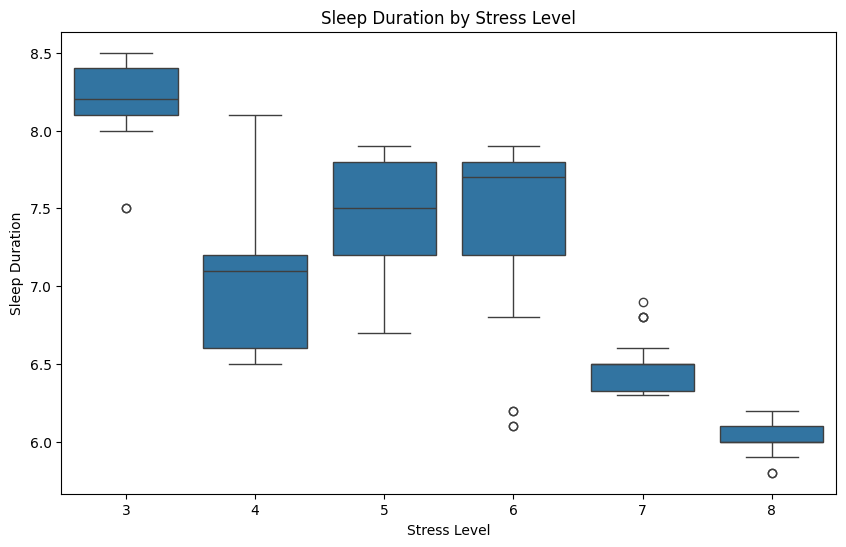

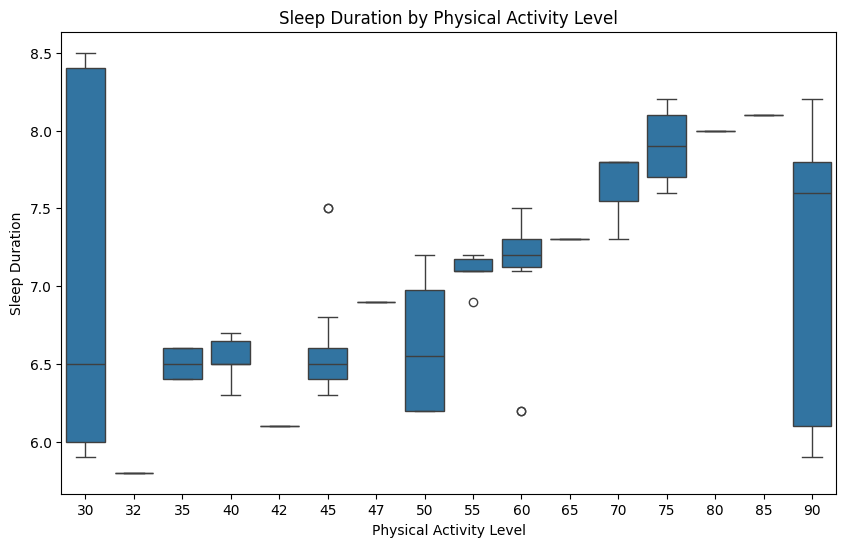

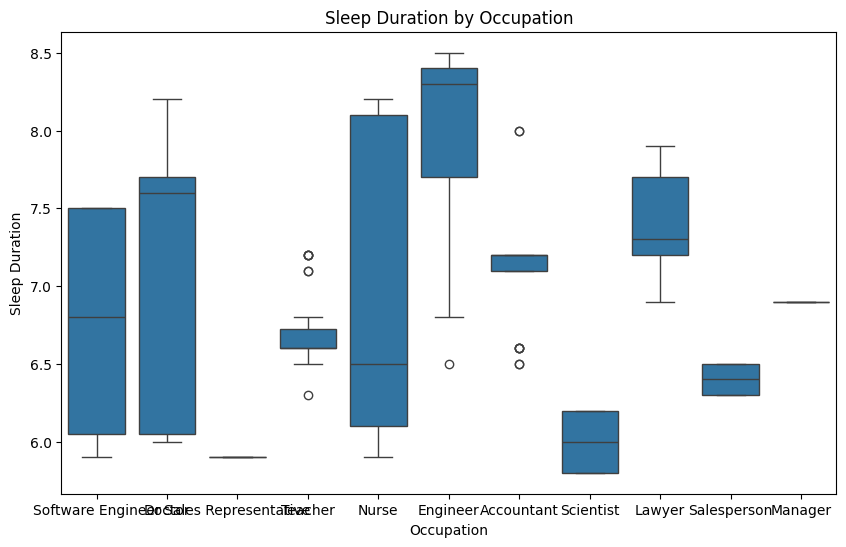

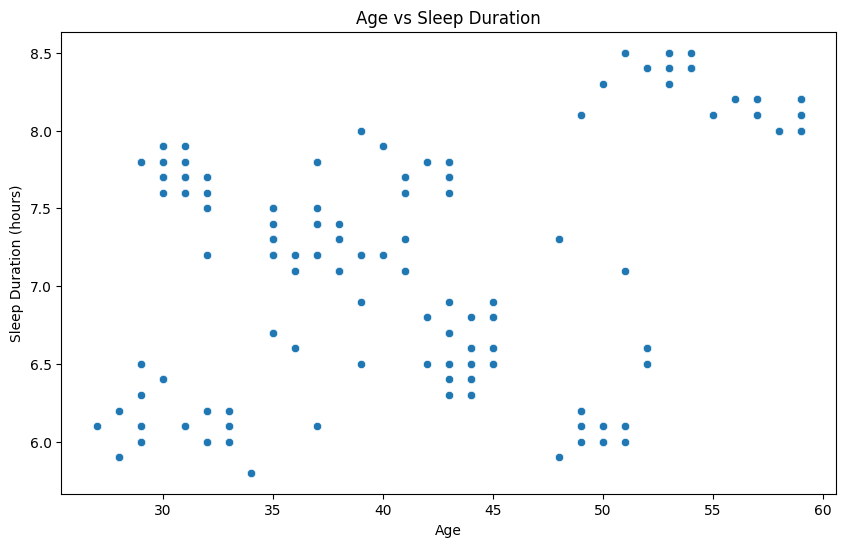

Time taken using Pandas: 4.221683 seconds


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


start_time_pd = time.time()
df = pd.read_csv('/Users/gaokangchen/NGEX6/sleep_health.csv')


plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], bins=30, kde=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], bins=30, kde=True)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Physical Activity Level'], bins=30, kde=True)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Stress Level'], bins=30, kde=True)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], bins=30, kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()


start_time_np = time.time()
data_np = df.to_numpy()


plt.figure(figsize=(10, 6))
plt.hist(data_np[:, 0], bins=30, alpha=0.7, color='blue')
plt.title('Age Distribution (NumPy)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(data_np[:, 1], bins=30, alpha=0.7, color='orange')
plt.title('Sleep Duration Distribution (NumPy)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()


grouped_vars = ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation']  # 删除 'BMI'

for var in grouped_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='Sleep Duration', data=df)
    plt.title(f'Sleep Duration by {var}')
    plt.xlabel(var)
    plt.ylabel('Sleep Duration')
    plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()


end_time_pd = time.time()
print(f"Time taken using Pandas: {end_time_pd - start_time_pd:.6f} seconds")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



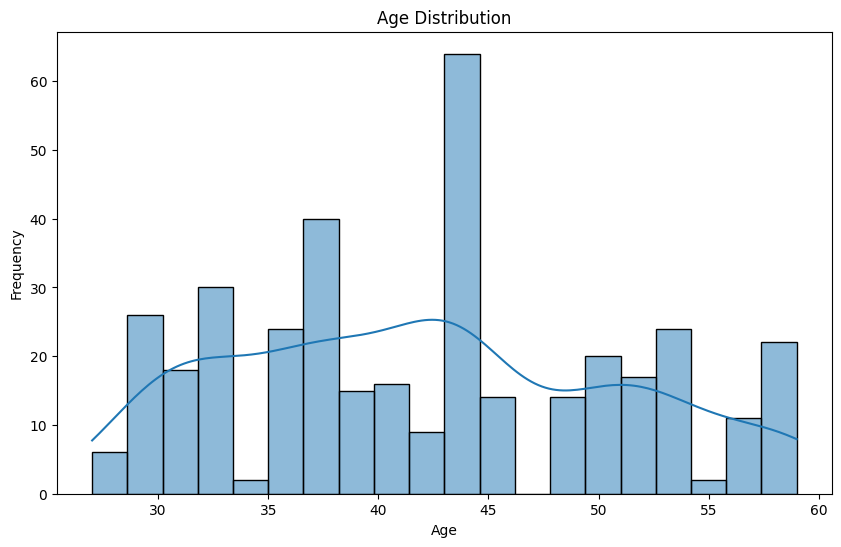

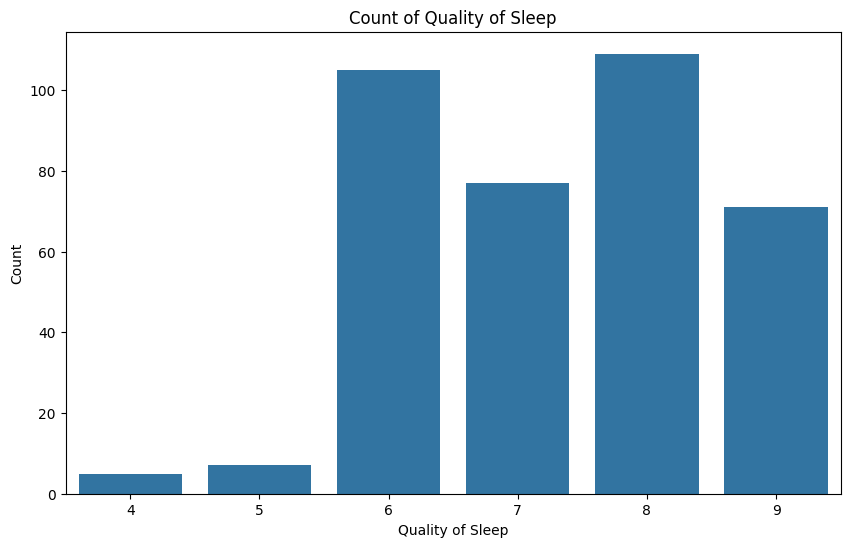

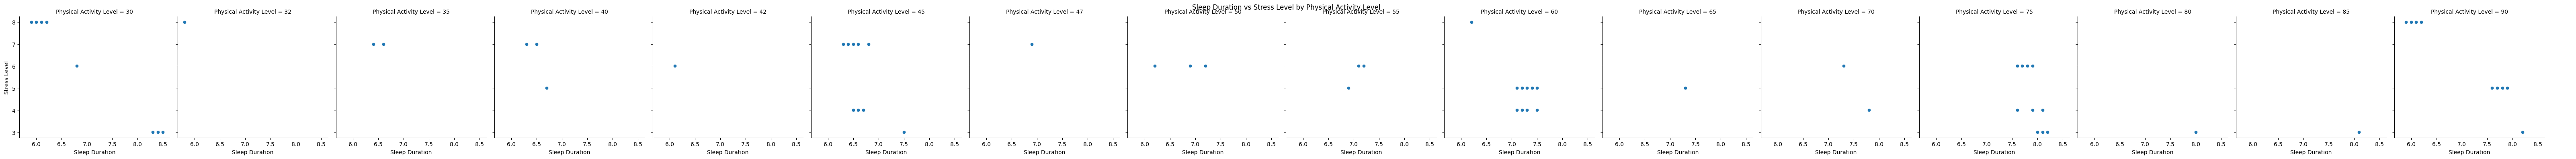

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Quality of Sleep', data=df)
plt.title('Count of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()

g = sns.FacetGrid(df, col='Physical Activity Level', height=4)
g.map(sns.scatterplot, 'Sleep Duration', 'Stress Level')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sleep Duration vs Stress Level by Physical Activity Level')
plt.show()

